In [1]:
import bagpy
import numpy as np
import pandas as pd
import seaborn as sns
from bagpy import bagreader
import matplotlib.pyplot as plt

In [2]:
!ls

bad_stationary_analysis.ipynb
bad_walking_analysis.ipynb
good_stationary_analysis.ipynb
good_walking_analysis.ipynb
moving_bad_data_2022-10-06-15-51-25
moving_bad_data_2022-10-06-15-51-25.bag
moving_good_data_2022-10-06-16-14-14
moving_good_data_2022-10-06-16-14-14.bag
stationary_bad_data_2022-10-06-15-37-46
stationary_bad_data_2022-10-06-15-37-46.bag
stationary_good_data_2022-10-06-16-02-30
stationary_good_data_2022-10-06-16-02-30.bag


In [3]:
b = bagreader('stationary_good_data_2022-10-06-16-02-30.bag')
gps_data = b.message_by_topic('/coordinates')
df_gps = pd.read_csv(gps_data)

[INFO]  Data folder stationary_good_data_2022-10-06-16-02-30 already exists. Not creating.


In [4]:
df_gps

,Time,easting,northing,altitude,zone_number,zone_letter,rtk_fix
0,1.665087e+09,328077.016247,4.689336e+06,16.3,19,T,4
1,1.665087e+09,328077.002062,4.689336e+06,16.3,19,T,4
2,1.665087e+09,328077.002062,4.689336e+06,16.3,19,T,4
3,1.665087e+09,328077.002516,4.689336e+06,16.3,19,T,4
4,1.665087e+09,328077.002516,4.689336e+06,16.3,19,T,4
...,...,...,...,...,...,...,...
630,1.665087e+09,328077.002062,4.689336e+06,16.3,19,T,4
631,1.665087e+09,328077.002516,4.689336e+06,16.3,19,T,4
632,1.665087e+09,328077.002516,4.689336e+06,16.3,19,T,4
633,1.665087e+09,328076.988786,4.689336e+06,16.3,19,T,4


In [5]:
df_gps['Time'] = df_gps['Time'] - min(df_gps['Time'])

In [6]:
df_gps['easting'] = df_gps['easting'] - np.mean(df_gps['easting'])

In [7]:
df_gps['northing'] = df_gps['northing'] - np.mean(df_gps['northing'])

In [8]:
df_gps

,Time,easting,northing,altitude,zone_number,zone_letter,rtk_fix
0,0.000000,0.017653,0.021060,16.3,19,T,4
1,1.029517,0.003468,0.002889,16.3,19,T,4
2,1.995491,0.003468,0.002889,16.3,19,T,4
3,3.033644,0.003922,0.021397,16.3,19,T,4
4,3.999178,0.003922,0.021397,16.3,19,T,4
...,...,...,...,...,...,...,...
630,630.061242,0.003468,0.002889,16.3,19,T,4
631,631.071153,0.003922,0.021397,16.3,19,T,4
632,632.058631,0.003922,0.021397,16.3,19,T,4
633,633.067043,-0.009809,0.021734,16.3,19,T,4


In [9]:
def plot_graph(xax, yax, units_x, units_y, scatter=False):
    if scatter:
        plt.scatter(df_gps[xax].tolist(), df_gps[yax].tolist())
    else:
        plt.plot(df_gps[xax].tolist(), df_gps[yax].tolist())
    plt.xlabel(f'{xax}({units_x})')
    plt.ylabel(f'{yax}({units_y})')
    plt.title(f'{yax} vs {xax}')
    plt.show()

In [10]:
df_east = df_gps['easting'].tolist()
df_east_max = max(max(df_east), abs(min(df_east)))
df_north = df_gps['northing'].tolist()
df_north_max = max(max(df_north), abs(min(df_north)))

df_max = max(df_east_max, df_north_max)
df_max

0.08863489236682653

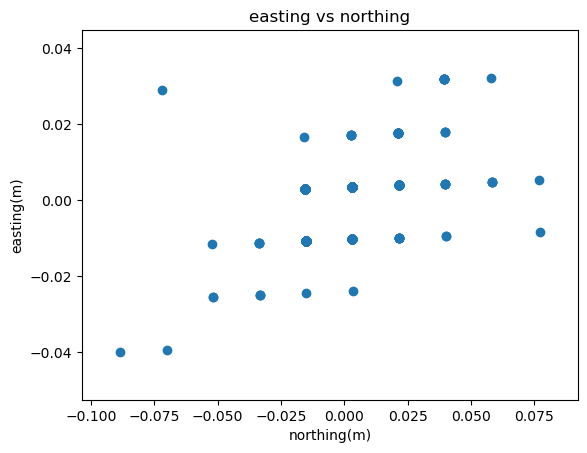

In [11]:
plot_graph('northing', 'easting', 'm', 'm', True)

In [12]:
# error = true value - measured value
def get_rsme(col_name):
    col_rsme = np.sqrt(np.square(0 - df_gps[col_name]).mean())
    return col_rsme

In [13]:
get_rsme('easting')

0.009542013898217787

In [14]:
get_rsme('northing')

0.01719372022940543

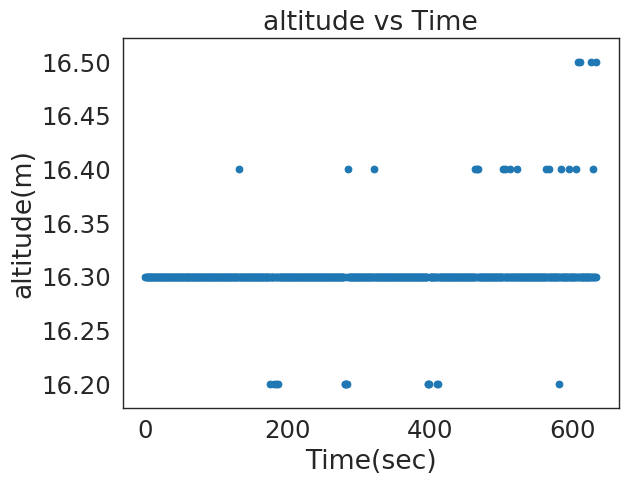

In [24]:
plot_graph('Time', 'altitude', 'sec', 'm', True)

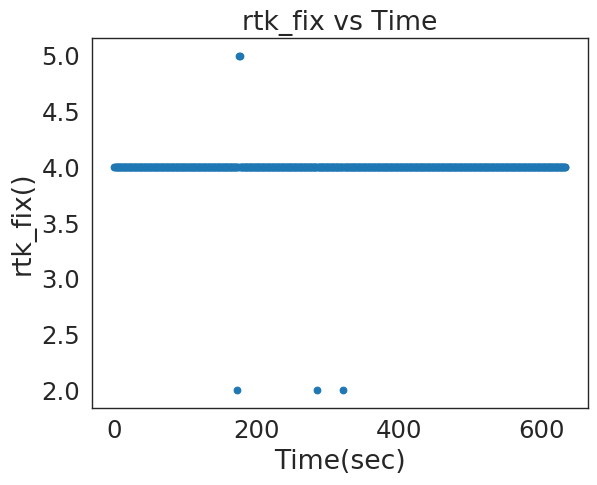

In [26]:
plot_graph('Time', 'rtk_fix', 'sec', '', True)

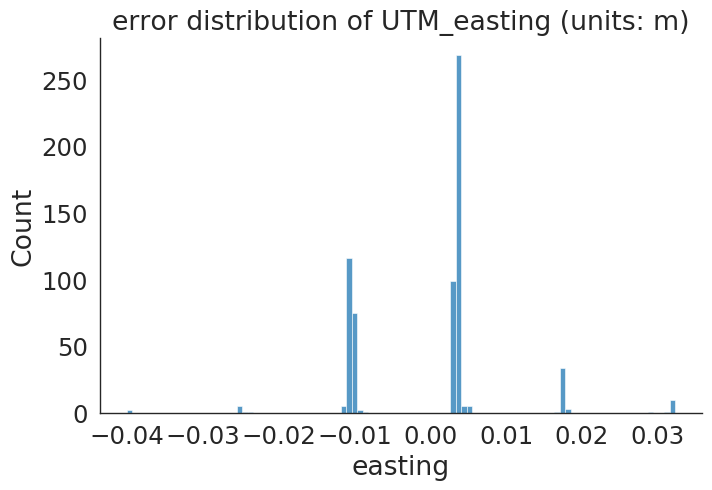

In [27]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_gps, x="easting", kind="hist", bins=100, aspect=1.5).set(title='error distribution of UTM_easting (units: m)')

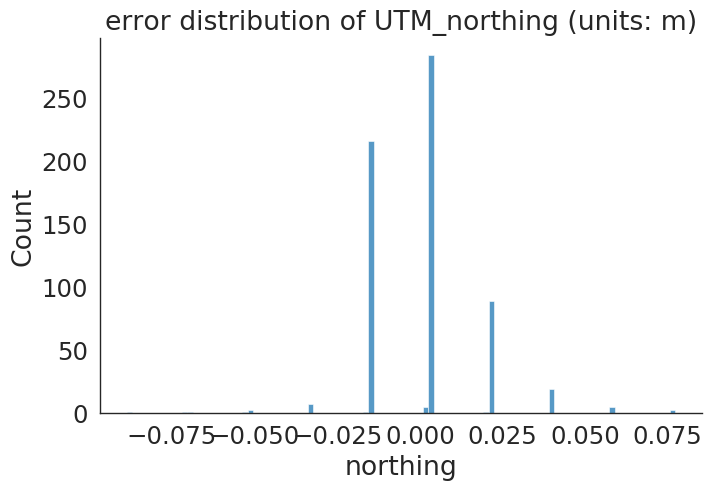

In [28]:
sns.displot(data=df_gps, x="northing", kind="hist", bins=100, aspect=1.5).set(title='error distribution of UTM_northing (units: m)')

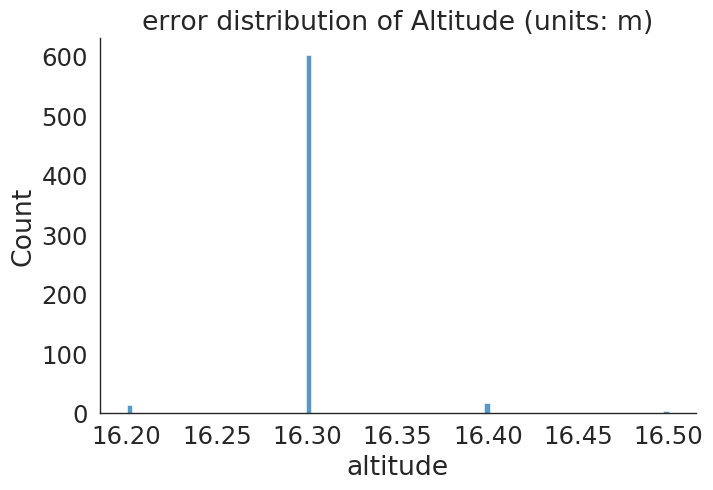

In [29]:
sns.displot(data=df_gps, x="altitude", kind="hist", bins=100, aspect=1.5).set(title='error distribution of Altitude (units: m)')

In [20]:
def get_bounds(col_name):
    col = df_gps[col_name].tolist()
    mean = np.mean(col)
    print(f'upper bound : {max(col)}')
    print(f'mean: {mean}')
    print(f'lower bound : {min(col)}')

In [21]:
get_bounds('easting')

upper bound : 0.032291725219693035
mean: -1.2374857044595434e-11
lower bound : -0.0399952296866104


In [22]:
get_bounds('northing')

upper bound : 0.07725469674915075
mean: -4.502614652077983e-10
lower bound : -0.08863489236682653


In [23]:
get_bounds('altitude')

upper bound : 16.5
mean: 16.301574803149613
lower bound : 16.2
